In [3]:
import os.path
import rmgpy
from rmgpy.data.thermo import ThermoDatabase
from rmgpy.chemkin import loadSpeciesDictionary
#from rmgpy.molecule.resonance import generateAromaticResonanceStructures

In [4]:
temperature = 298

In [5]:
databasePath = os.path.join(rmgpy.settings['database.directory'], 'thermo')

database = ThermoDatabase()
database.load(
    path = databasePath,
    libraries = ['PAHLibrary'],
    )

In [6]:
speciesList1 = loadSpeciesDictionary('/home/mjliu/Documents/PAHThermo/species_dictionary.txt')
speciesList2 = loadSpeciesDictionary('/home/mjliu/Documents/PAHThermo/species_dictionary.txt')

In [7]:
for label, spec in speciesList1.iteritems():
    #amol = generateAromaticResonanceIsomers(spec.molecule[0])
    #spec.thermo = database1.estimateThermoViaGroupAdditivity(amol[0])
    spec.thermo = database.getThermoDataFromGroups(spec)
    spec.h = spec.thermo.getEnthalpy(temperature) / 4184
    spec.s = spec.thermo.getEntropy(temperature) / 4.184

In [8]:
for label, spec in speciesList2.iteritems():
    spec.thermo = database.getThermoData(spec)
    spec.h = spec.thermo.getEnthalpy(temperature) / 4184
    spec.s = spec.thermo.getEntropy(temperature) / 4.184

In [25]:
speciesList1['A5'].thermo

ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([263.425,346.1,414.718,470.616,552.623,613.04,696.05],'J/(mol*K)'), H298=(307.942,'kJ/mol'), S298=(336.739,'J/(mol*K)'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(781.56,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(Cbf-CbCbCbf) + other(R) + group(Cbf-CbCbCbf) + other(R) + group(Cbf-CbCbfCbf) + other(R) + group(Cbf-CbCbfCbf) + other(R) + group(Cbf-CbCbfCbf) + other(R) + group(Cbf-CbCbfCbf) + other(R) + group(Cbf-CbCbCbf) + other(R) + group(Cbf-CbCbCbf) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + polycyclic(s2_6_6_naphthalene) + polycyclic(s2_6_6_naphthalene) + polycyclic(s2_6_6_naphthalene) + polycyclic(s2_6_6_naphthalene) + polycyclic(s2_6_6_nap

In [9]:
labels = []
gavEnthalpy = []
gavEntropy = []
calcEnthalpy = []
calcEntropy = []

for label in speciesList1.keys():
    labels.append(label)
    
    gavEnthalpy.append(speciesList1[label].h)
    gavEntropy.append(speciesList1[label].s)

    calcEnthalpy.append(speciesList2[label].h)
    calcEntropy.append(speciesList2[label].s)

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [11]:
p = figure(plot_width=500, plot_height=400)

# add a square renderer with a size, color, and alpha
p.circle(gavEnthalpy, calcEnthalpy, size=10, color="green", alpha=0.5)

x = np.array([0, 200])
y = x
p.line(x=x, y=y, line_width=2, color='#636363')
#p.line(x=x, y=y+2, line_width=2,line_dash="dashed", color='#bdbdbd')
#p.line(x=x, y=y-2, line_width=2, line_dash="dashed", color='#bdbdbd')

p.xaxis.axis_label = "H298 GAV (kcal/mol/K)"
p.yaxis.axis_label = "H298 G3(MP2)//B3 (kcal/mol/K)"
p.xaxis.axis_label_text_font_style = "normal"
p.yaxis.axis_label_text_font_style = "normal"

show(p)

In [12]:
p = figure(plot_width=500, plot_height=400)

# add a square renderer with a size, color, and alpha
p.circle(gavEntropy, calcEntropy, size=10, color="green", alpha=0.5)

x = np.array([0, 140])
y = x
p.line(x=x, y=y, line_width=2, color='#636363')
#p.line(x=x, y=y+2, line_width=2,line_dash="dashed", color='#bdbdbd')
#p.line(x=x, y=y-2, line_width=2, line_dash="dashed", color='#bdbdbd')

p.xaxis.axis_label = "S298 GAV (cal/mol/K)"
p.yaxis.axis_label = "S298 G3(MP2)//B3 (cal/mol/K)"
p.xaxis.axis_label_text_font_style = "normal"
p.yaxis.axis_label_text_font_style = "normal"

show(p)

In [ ]:
hDiff = np.subtract(calcEnthalpy,gavEnthalpy)
plt.plot(np.sort(hDiff),'bo')
plt.show()

In [ ]:
print np.mean(np.absolute(np.subtract(calcEnthalpy,gavEnthalpy)))
print np.mean(np.absolute(np.subtract(calcEntropy,gavEntropy)))

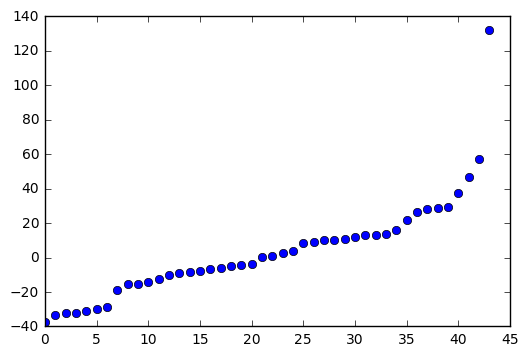

In [12]:
sDiff = np.subtract(calcEntropy,gavEntropy)
plt.plot(np.sort(sDiff),'bo')
plt.show()

In [ ]:
plt.plot(hDiff, sDiff, 'bo')
plt.xlabel('Enthalpy Error')
plt.ylabel('Entropy Error')
plt.show()

In [13]:
indices = np.where(sDiff>120)[0]
for index in indices:
    print labels[index]
    #print speciesList1[labels[index]].thermo.comment

A5


In [ ]:
indices = np.where(np.logical_and(sDiff<40,sDiff>20))[0]
for index in indices:
    print labels[index]
    #print speciesList1[labels[index]].thermo.comment

In [ ]:
indices = np.where(np.logical_and(sDiff<20,sDiff>-20))[0]
for index in indices:
    print labels[index]
    #print speciesList1[labels[index]].thermo.comment

In [ ]:
indices = np.where(sDiff<-20)[0]
for index in indices:
    print labels[index]
    #print speciesList1[labels[index]].thermo.comment